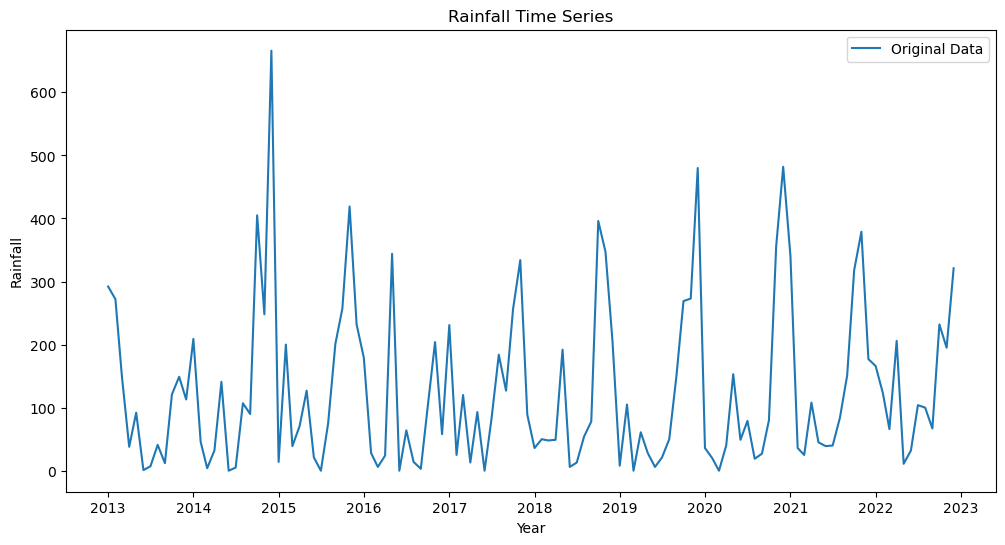

C:\Users\KavinduRathnasiri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\KavinduRathnasiri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Predicted Rainfall Values:


,Year,Month,Predicted Rainfall
0,2023,1,156.348320
1,2023,2,93.295232
2,2023,3,48.585717
3,2023,4,66.043299
4,2023,5,126.603304
5,2023,6,18.462574
6,2023,7,44.160796
7,2023,8,75.665946
8,2023,9,94.189781
9,2023,10,246.914960


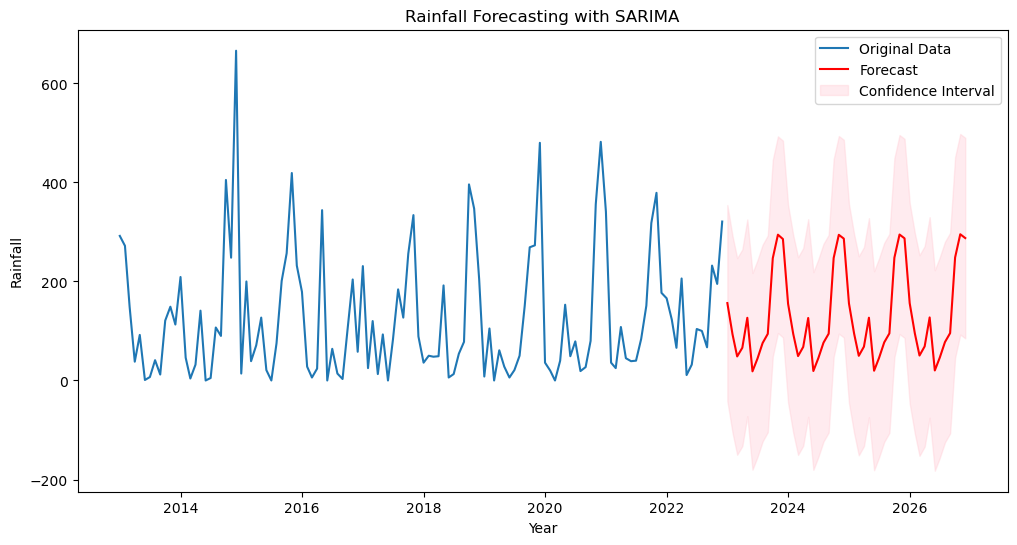

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from IPython.display import display

# Load your dataset
# Assuming your data is in a CSV file named 'rainfall_data.csv'
df = pd.read_csv('Trinco.csv')

# Convert 'Year' and 'Month' columns to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Drop the original 'Year' and 'Month' columns
df.drop(['Year', 'Month'], axis=1, inplace=True)

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rainfall'], label='Original Data')
plt.title('Rainfall Time Series')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

# Fit SARIMA model
model = SARIMAX(df['Rainfall'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast for the next 3 years (36 months)
forecast_steps = 48
forecast = results.get_forecast(steps=forecast_steps)

# Display the predicted rainfall values along with Year and Month
forecast_df = pd.DataFrame({
    'Year': forecast.predicted_mean.index.year,
    'Month': forecast.predicted_mean.index.month,
    'Predicted Rainfall': forecast.predicted_mean.values
})

# Save the forecast_df to an Excel file
forecast_df.to_excel('forecasted_rainfall.xlsx', index=False)

# Print the predicted rainfall values
print("Predicted Rainfall Values:")
display(forecast_df)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rainfall'], label='Original Data')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean.values, label='Forecast', color='red')
plt.fill_between(forecast.predicted_mean.index, forecast.conf_int()['lower Rainfall'], forecast.conf_int()['upper Rainfall'], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Rainfall Forecasting with SARIMA')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


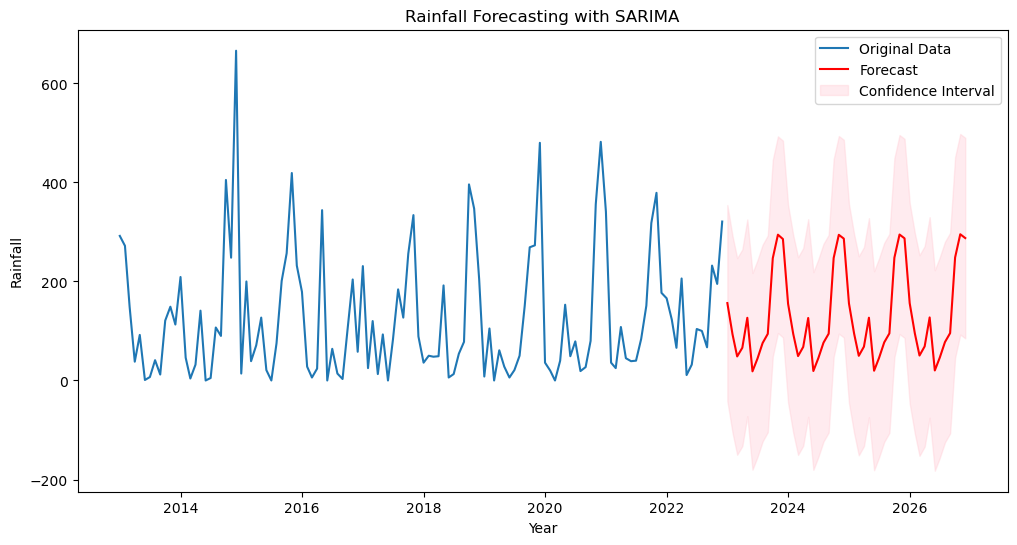

In [3]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rainfall'], label='Original Data')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean.values, label='Forecast', color='red')
plt.fill_between(forecast.predicted_mean.index, forecast.conf_int()['lower Rainfall'], forecast.conf_int()['upper Rainfall'], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Rainfall Forecasting with SARIMA')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.legend()
plt.show()
